# Librerías e Instalaciones

In [ ]:
!pip install kneed

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator

# Tutorial modelo K-Means

In [ ]:
features, true_labels = make_blobs(
    n_samples = 200,
    centers = 3,
    cluster_std = 2.75,
    random_state = 42
)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

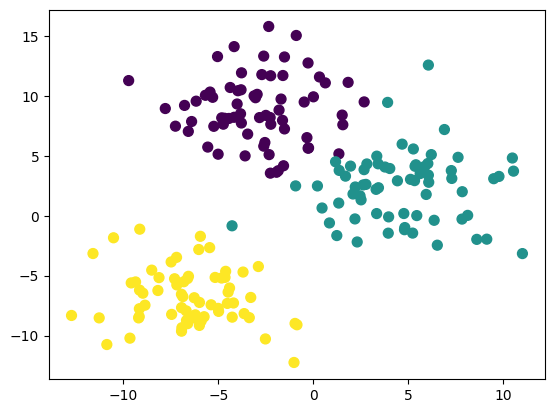

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=true_labels, s=50, cmap='viridis')

In [ ]:
kmeans = KMeans(
    init = "random",
    n_clusters = 3,
    n_init = 10,
    max_iter = 300,
    random_state = 42
)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

74.57960106819854

In [ ]:
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [ ]:
kmeans.n_iter_

10

In [ ]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

In [1]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title('Clusters K-Means (sin usar etiquetas)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

NameError: name 'PCA' is not defined

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

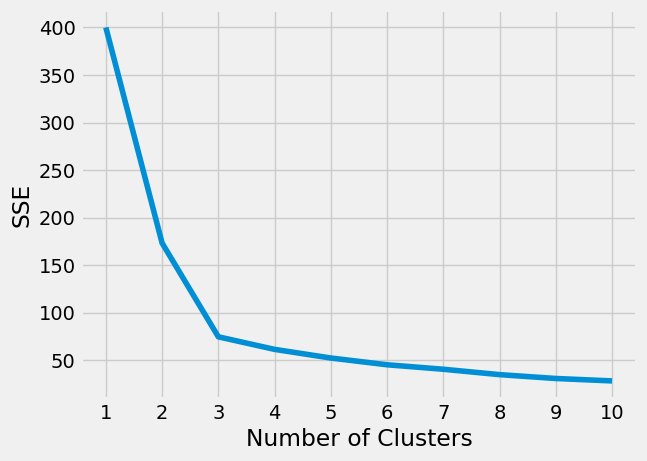

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

np.int64(3)

In [ ]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

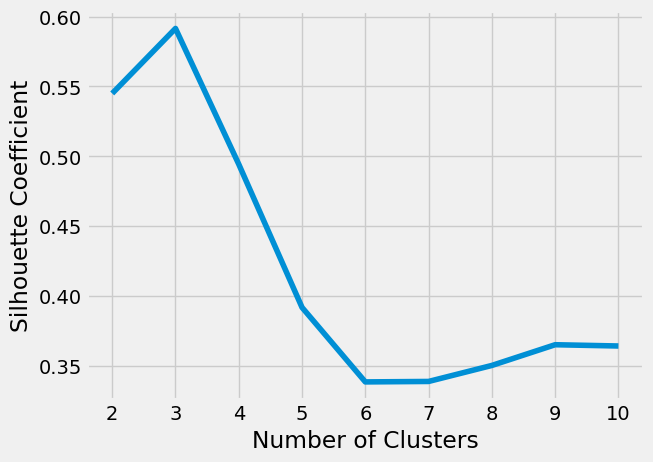

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Cmbios en el modelo K-Means

In [ ]:
n = 6000
n_centers = 8
std = 1.125

x, y = make_blobs(
    n_samples=n,
    centers=n_centers,
    cluster_std=std,
    random_state=42
)

In [ ]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

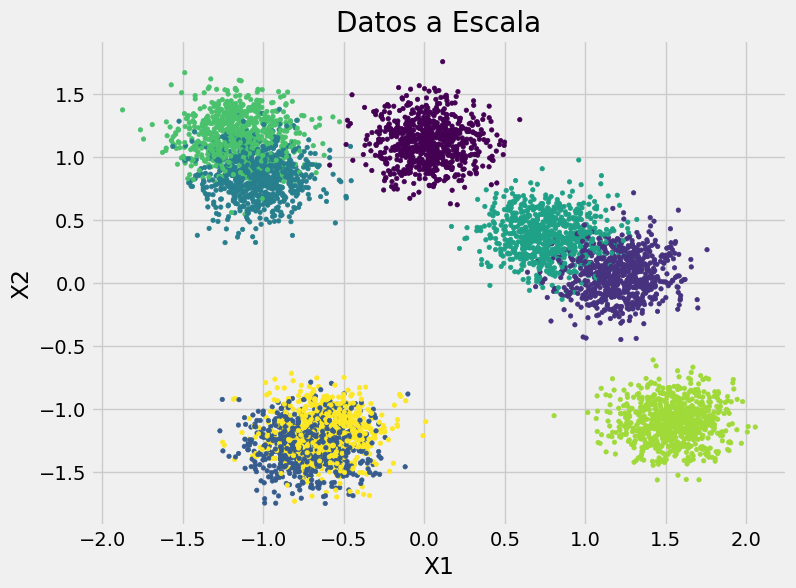

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_x[:, 0], scaled_x[:, 1], c=y,s=10, cmap='viridis')
plt.title('Datos a Escala')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Mejoras en la cantidad de Iteraciones


In [ ]:
sse = []
km_kwargs = {
    "init": "k-means++",
    "n_init": 20,
    "max_iter": 500,
    "random_state": 42,
}

In [ ]:
for k in range(1, 15):
    km = KMeans(n_clusters=k, **km_kwargs)
    km.fit(scaled_x)
    sse.append(km.inertia_)

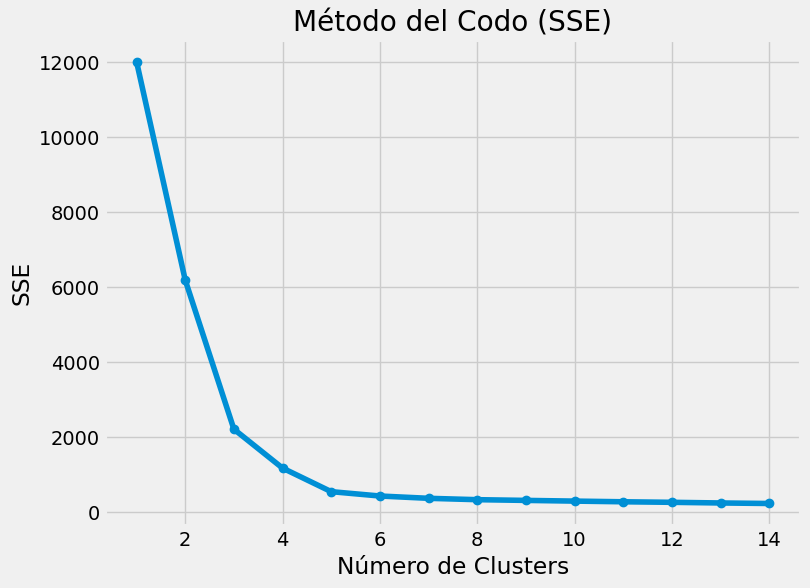

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), sse, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.title("Método del Codo (SSE)")
plt.show()

In [ ]:
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
print(f"Elbow encontrado en: {kl.elbow}")

Elbow encontrado en: 4


In [ ]:
silhouette_scores = []
davies_bouldin_scores = []

In [ ]:
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette = silhouette_score(scaled_features, labels)
    db_index = davies_bouldin_score(scaled_features, labels)
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(db_index)

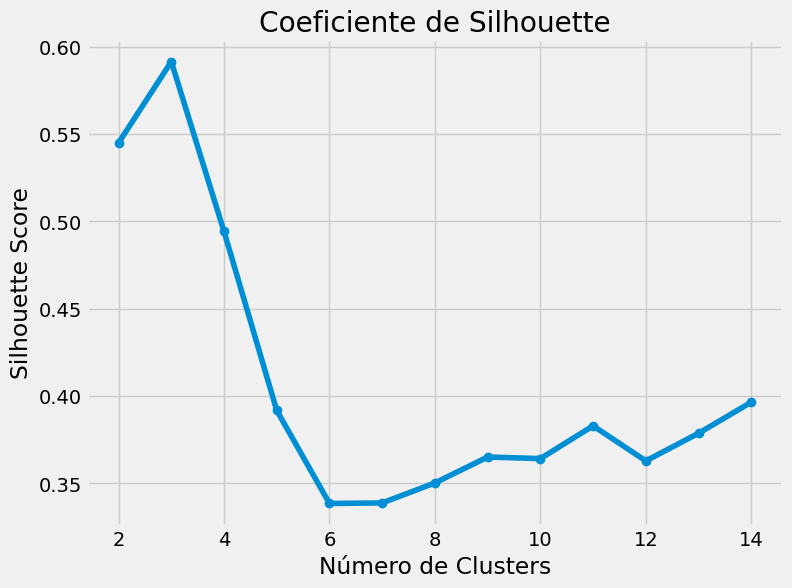

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.title("Coeficiente de Silhouette")
plt.show()

In [ ]:
best_k = range(2, 15)[np.argmin(davies_bouldin_scores)]
print(f"Mejor número de clusters según Davies-Bouldin: {best_k}")

Mejor número de clusters según Davies-Bouldin: 3


In [ ]:
final_kmeans = KMeans(n_clusters=best_k, **kmeans_kwargs)
final_kmeans.fit(scaled_features)
labels = final_kmeans.labels_

## PCA

In [ ]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

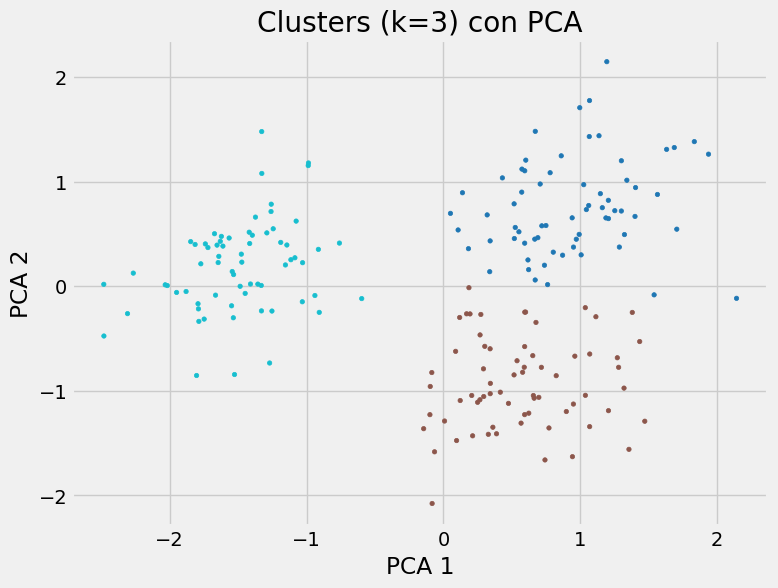

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='tab10', s=10)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Clusters (k={best_k}) con PCA")
plt.show()

## IsolationForest con Calinski-Harabasz Score


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(scaled_features)
filtered_features = scaled_features[outliers == 1]


kmeans = MiniBatchKMeans(
    n_clusters=best_k,
    init='k-means++',
    n_init=20,
    max_iter=500,
    random_state=42,
    batch_size=256
)
kmeans.fit(filtered_features)

labels = kmeans.labels_
ch_index = calinski_harabasz_score(filtered_features, labels)
print(f"Calinski-Harabasz Index: {ch_index:.4f}")


Calinski-Harabasz Index: 439.3334


<ipython-input-37-6af2090c3af1>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(scaled_features[:, 0], scaled_features[:, 1], cmap='tab10', s=10, alpha=0.6)


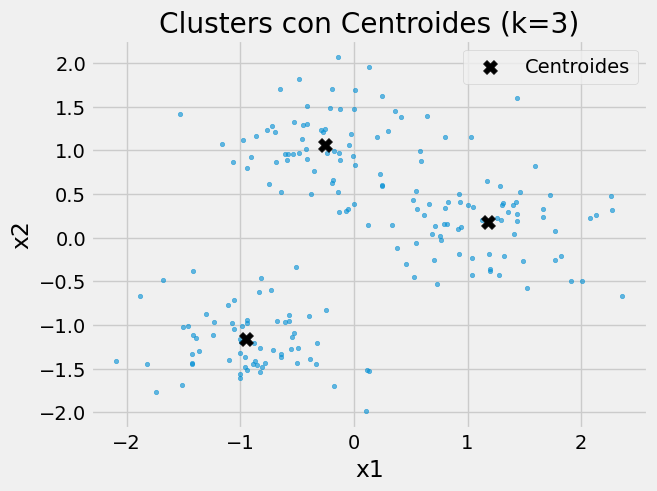

In [ ]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], cmap='tab10', s=10, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=100, label='Centroides')
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"Clusters con Centroides (k={best_k})")
plt.show()